<h2> 군집화 </h2>
<h3> [데이터 불러오기 및 다듬기] </h3>

In [60]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df3 = pd.read_csv('Data3_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()
df2 = raw_df2.copy()
df3 = raw_df3.copy()

In [61]:
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00","32,690.00","30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,633.00","32,690.00","30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,633.00","32,690.00","30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,633.00","32,690.00","30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,633.00","32,690.00","30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"1,001,880.00","530,320.00","471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00"
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"1,001,880.00","530,320.00","471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00"
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"1,001,880.00","530,320.00","471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00"
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"1,001,880.00","530,320.00","471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00"


In [78]:
# 시군명 별로 데이터를 그룹화
grouped_df = df1.groupby('시군명').agg({
    '결제건수': 'sum',
    '결제금액': 'sum',
    '총인구': 'mean'  # 총인구는 평균을 사용하여 시군별로 인구를 대체
}).reset_index()

# 컬럼 이름 변경
grouped_df = grouped_df.rename(columns={
    '결제건수': '총결제건수',  # '결제건수'를 '총 결제건수'로 변경
    '결제금액': '총결제금액'   # '결제금액'을 '총 결제금액'으로 변경
})

# 결제건수 비율과 결제금액 비율 계산
grouped_df['결제건수 비율'] = grouped_df['총결제건수'] / grouped_df['총인구']
grouped_df['결제금액 비율'] = grouped_df['총결제금액'] / grouped_df['총인구']
grouped_df


,시군명,총결제건수,총결제금액,총인구,결제건수 비율,결제금액 비율
0,가평군,2828907,"7,258,474.04","63,633.00",44.46,114.07
1,고양시,18627130,"37,926,045.64","1,085,432.00",17.16,34.94
2,과천시,5781679,"12,556,369.47","85,177.00",67.88,147.42
3,광명시,16375894,"40,245,599.01","281,279.00",58.22,143.08
4,광주시,28224807,"69,045,805.68","407,192.00",69.32,169.57
5,구리시,11311464,"28,538,813.44","187,771.00",60.24,151.99
6,군포시,14863136,"31,019,829.02","264,822.00",56.13,117.13
7,김포시,15449433,"50,529,938.71","510,263.00",30.28,99.03
8,남양주시,19045416,"52,255,188.02","742,060.00",25.67,70.42
9,동두천시,3451815,"8,378,959.17","91,493.00",37.73,91.58


In [63]:
# 결제건수 비율과 결제금액 비율 계산
df1['결제건수 비율'] = df1['결제건수'] / df1['총인구']
df1['결제금액 비율'] = df1['결제금액'] / df1['총인구']


In [64]:
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,결제건수 비율,결제금액 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00,0.13,0.30
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,633.00",...,"30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00,0.10,0.28
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,633.00",...,"30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00,1.11,2.43
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,633.00",...,"30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00,0.87,2.09
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,633.00",...,"30,943.00","32,859.00","62,393.00","32,133.00","30,260.00","1,240.00",557.00,683.00,1.74,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"1,001,880.00",...,"471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00",0.39,0.87
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"1,001,880.00",...,"471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00",0.09,0.20
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"1,001,880.00",...,"471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00",0.09,0.21
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"1,001,880.00",...,"471,560.00","409,777.00","953,615.00","495,090.00","458,525.00","48,265.00","35,230.00","13,035.00",0.01,0.03


In [65]:
# 기준년월에서 기준연도 추출
df2['기준연도'] = df2['기준년월'].str[:4].astype(int)

In [66]:
df2

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원),기준연도
0,가평군,2023-12,484.00,"405,100.00","214,000.00",2023
1,가평군,2023-11,458.00,"236,800.00","218,700.00",2023
2,가평군,2023-10,555.00,"259,600.00","233,500.00",2023
3,가평군,2023-09,782.00,"311,300.00","237,600.00",2023
4,가평군,2023-08,473.00,"363,100.00","239,200.00",2023
...,...,...,...,...,...,...
1111,화성시,2021-05,"7,615.00","2,695,582.00","2,757,823.00",2021
1112,화성시,2021-04,"23,662.00","2,789,792.00","2,789,886.00",2021
1113,화성시,2021-03,"13,378.00","1,801,626.00","2,019,251.00",2021
1114,화성시,2021-02,"23,305.00","1,801,626.00","2,019,251.00",2021


In [67]:
df3

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가시설
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,병원 및 의료기관
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,기타 의료 및 복지시설
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,카페 및 베이커리
...,...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,계속사업자,NaN,20240331,차량 및 관련 서비스
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,계속사업자,NaN,20240331,음식점
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,계속사업자,NaN,20240331,학원 및 교육서비스
418748,화성시,다함 목재,기타건축자재,3403,계속사업자,NaN,20240331,인테리어 및 건축자재


In [68]:
상점수 = df3.groupby('시군명').size().reset_index(name='상점수')

# 시군명별 총 업종 개수 구하기
시군별_상점수 = 상점수.groupby('시군명')['상점수'].sum().reset_index()

df3_count = 시군별_상점수.sort_values(by = '시군명')
df3_count

,시군명,상점수
0,가평군,3354
1,고양시,26672
2,과천시,2032
3,광명시,10594
4,광주시,11204
5,구리시,6281
6,군포시,7370
7,김포시,14833
8,남양주시,20531
9,동두천시,3308


<hr>
여기 전까지 우선 데이터 다듬기

In [69]:
# 데이터 병합 (시군명과 기준연도 기준)
merged_data1 = pd.merge(df1, df2, on=['시군명', '기준연도'], how='inner')
merged_data = pd.merge(merged_data1, df3_count, on='시군명', how='inner')

In [70]:
merged_data

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,등록외국인_총인구,등록외국인_남,등록외국인_여,결제건수 비율,결제금액 비율,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원),상점수
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"1,240.00",557.00,683.00,0.13,0.30,2023-12,484.00,"405,100.00","214,000.00",3354
1,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"1,240.00",557.00,683.00,0.13,0.30,2023-11,458.00,"236,800.00","218,700.00",3354
2,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"1,240.00",557.00,683.00,0.13,0.30,2023-10,555.00,"259,600.00","233,500.00",3354
3,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"1,240.00",557.00,683.00,0.13,0.30,2023-09,782.00,"311,300.00","237,600.00",3354
4,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,633.00",...,"1,240.00",557.00,683.00,0.13,0.30,2023-08,473.00,"363,100.00","239,200.00",3354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571,2021,화성시,80대 이상,여,19625,"44,199.13",191.00,620.81,2.25,"1,001,880.00",...,"48,265.00","35,230.00","13,035.00",0.02,0.04,2021-05,"7,615.00","2,695,582.00","2,757,823.00",27663
15572,2021,화성시,80대 이상,여,19625,"44,199.13",191.00,620.81,2.25,"1,001,880.00",...,"48,265.00","35,230.00","13,035.00",0.02,0.04,2021-04,"23,662.00","2,789,792.00","2,789,886.00",27663
15573,2021,화성시,80대 이상,여,19625,"44,199.13",191.00,620.81,2.25,"1,001,880.00",...,"48,265.00","35,230.00","13,035.00",0.02,0.04,2021-03,"13,378.00","1,801,626.00","2,019,251.00",27663
15574,2021,화성시,80대 이상,여,19625,"44,199.13",191.00,620.81,2.25,"1,001,880.00",...,"48,265.00","35,230.00","13,035.00",0.02,0.04,2021-02,"23,305.00","1,801,626.00","2,019,251.00",27663


In [71]:
# 필요한 변수 선택 및 전처리
features = merged_data[['결제건수', '결제금액', '월별충전액(만원)', '월별사용액(만원)', '총인구']]
features
# NaN 값 확인
print(merged_data.isna())            # 각 위치에 NaN이 있는지 확인
print(merged_data.isna().sum())      # 각 열에 NaN의 개수 확인
print(merged_data.isna().sum().sum())# 전체 데이터프레임에서 NaN의 총 개수 확인


        기준연도    시군명    연령대     성별   결제건수   결제금액  결제취소건수  결제취소금액  1회평균결제금액  \
0      False  False  False  False  False  False   False   False     False   
1      False  False  False  False  False  False   False   False     False   
2      False  False  False  False  False  False   False   False     False   
3      False  False  False  False  False  False   False   False     False   
4      False  False  False  False  False  False   False   False     False   
...      ...    ...    ...    ...    ...    ...     ...     ...       ...   
15571  False  False  False  False  False  False   False   False     False   
15572  False  False  False  False  False  False   False   False     False   
15573  False  False  False  False  False  False   False   False     False   
15574  False  False  False  False  False  False   False   False     False   
15575  False  False  False  False  False  False   False   False     False   

         총인구  ...  등록외국인_총인구  등록외국인_남  등록외국인_여  결제건수 비율  결제금액 비율   기준년월  \


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


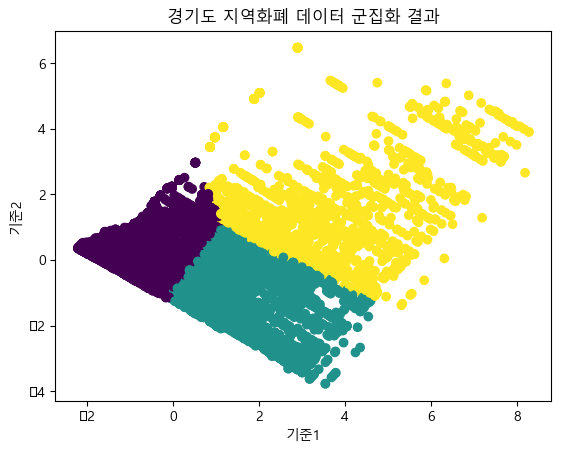

In [72]:
features = features.fillna(0)  # 결측값을 0으로 대체
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 차원 축소 (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# K-means 군집화
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(principal_components)

# 결과 시각화
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('기준1')
plt.ylabel('기준2')
plt.title('경기도 지역화폐 데이터 군집화 결과')
plt.show()